In [443]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium

import geojson as gj
import plotly.express as px
import json
import urllib.request
import requests
from urllib.request import urlopen
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import display


mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'

%matplotlib inline

### memanggil dataset

In [444]:
dataset = "london_crime_by_lsoa.csv"
df = pd.read_csv(dataset)

In [445]:
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


### type dataset

In [446]:
print(df.dtypes)

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object


In [447]:
df.tail(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490594,E01001706,Greenwich,Criminal Damage,Criminal Damage To Other Building,0,2008,2
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,E01000588,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


### jumlah baris dan kolom pada dataset

In [448]:
df.shape

(13490604, 7)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [450]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [451]:
df.columns

Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')

In [452]:
# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [453]:
df.head(2)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11


In [454]:
# let's rename the columns so that they make sense
df.rename (columns = {'borough':'Region'}, inplace = True)

In [455]:
df.head(2)

,lsoa_code,Region,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11


In [456]:
# let's rename the columns so that they make sense
df.rename (columns = {'borough':'Region', 'major_category':'Major Category', 'minor_category':'Minor Category'}, inplace = True)

In [457]:
df.head(2)

,lsoa_code,Region,Major Category,Minor Category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11


In [458]:
df.head()

,lsoa_code,Region,Major Category,Minor Category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [459]:
df.columns

Index(['lsoa_code', 'Region', 'Major Category', 'Minor Category', 'value',
       'year', 'month'],
      dtype='object')

In [460]:
# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))

In [461]:
df.head()

,lsoa_code,Region,Major Category,Minor Category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [462]:
df.head(2)

,lsoa_code,Region,Major Category,Minor Category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11


In [463]:
# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(2008, 2016)))
print ('data dimensions:', df.shape)

data dimensions: (13490604, 7)


In [464]:
print("To display column values ")
df=df.head(10)
df.columns.values

To display column values 


array(['lsoa_code', 'Region', 'Major Category', 'Minor Category', 'value',
       'year', 'month'], dtype=object)

In [465]:
df

,lsoa_code,Region,Major Category,Minor Category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


# WorldCloud

In [466]:
f = open("london_news.txt", "r")
isi_text = f.read()

In [467]:
print(isi_text)

Background
London is the capital and largest city of England and the United Kingdom. London exerts a considerable impact upon the arts, commerce, education, entertainment, fashion, finance, health-care, media, professional services, research and development, tourism and transportation. It is the most-visited city as measured by international arrivals and has the busiest city airport system as measured by passenger traffic.

Problem
As London is one of the most important cities in the world so the security of the city is most important. There are always some parts of the city that have more crime rates than any other part. So the problem is with people who migrate from different parts of the world for work and business. They are pretty much conscious about the selection of the area for residence from a safety point of view. This analysis will also help local police to focus and control the crimes in those areas which become the major centers for criminal activities.

Solution
This proje

In [468]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

In [469]:
wordcloud.generate(isi_text)

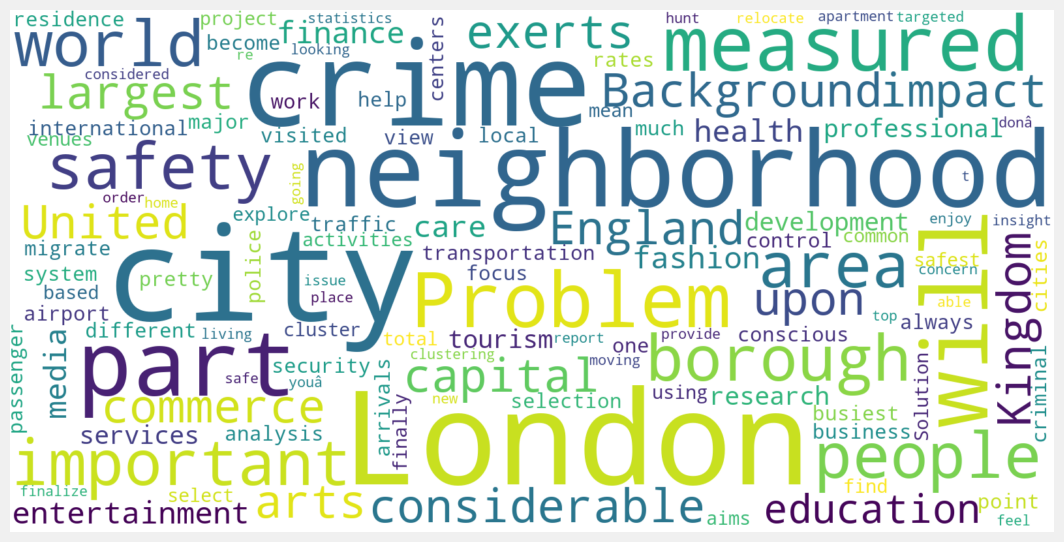

In [470]:
plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [475]:
gambar = np.array(Image.open('newyork.png'))

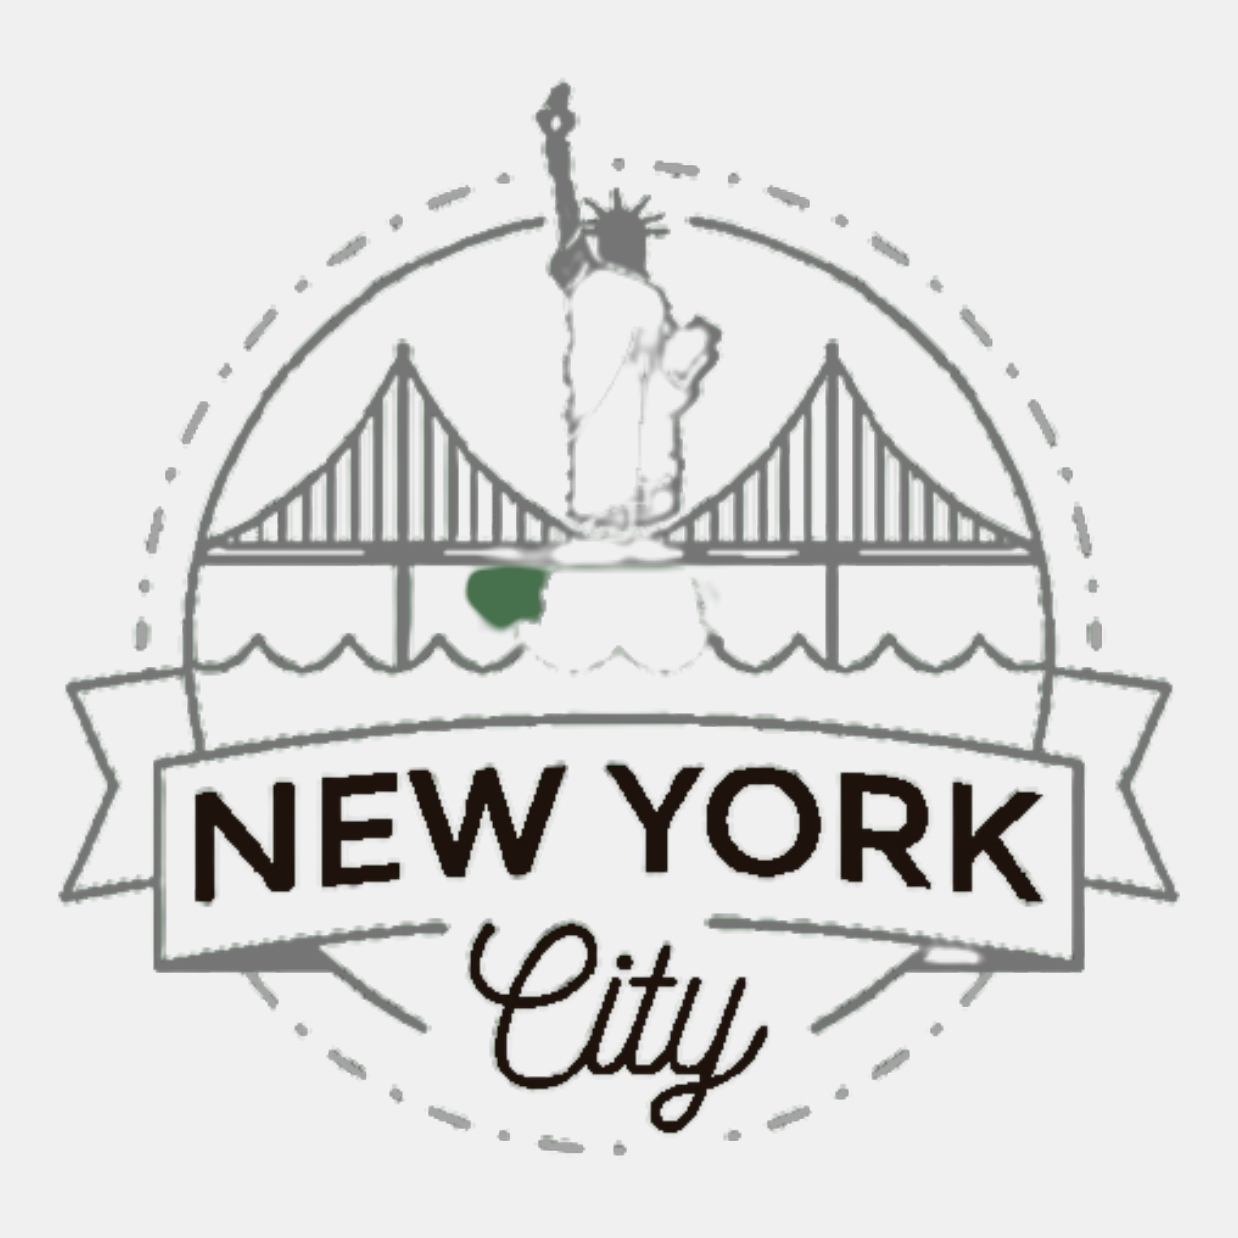

In [476]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(gambar, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

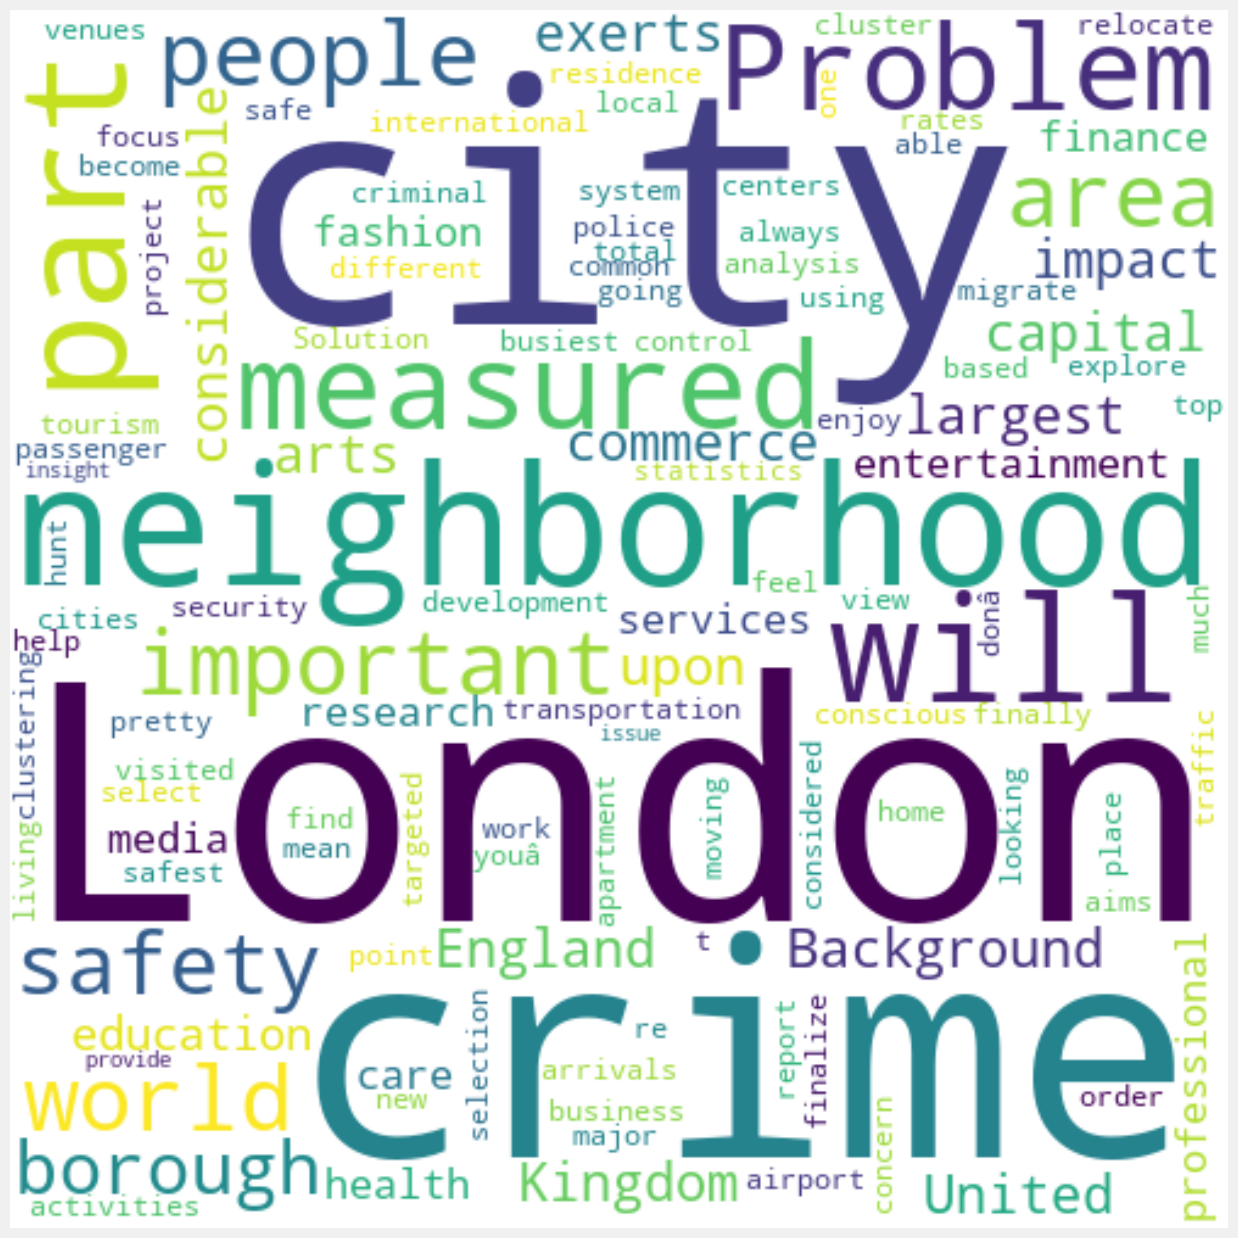

In [477]:
stopwords = set(STOPWORDS)
stopwords.add('said')
# instantiate a word cloud object
wordcloud = WordCloud(background_color='white', max_words=2000, mask=gambar, stopwords=stopwords)

# generate the word cloud
wordcloud.generate(isi_text)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regresion Plots

## pie chart

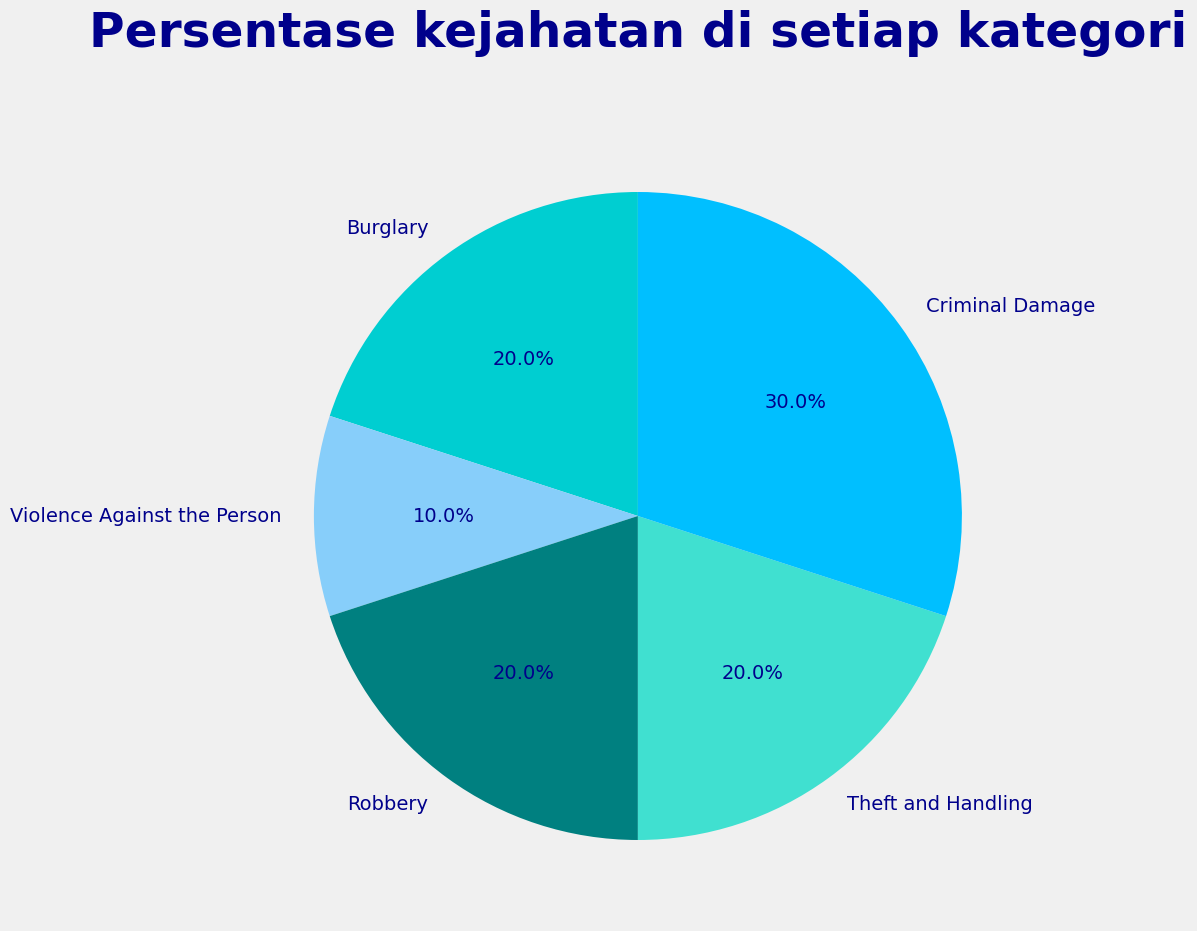

In [359]:
lables=df['Major Category'].unique()

sizes=df.groupby(['Major Category']).size()
colors=['darkturquoise','lightskyblue','teal','turquoise', 'deepskyblue','steelblue','lightsteelblue','cornflowerblue','paleturquoise']
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.title('Persentase kejahatan di setiap kategori\n',fontdict=font1)
ab=plt.pie(sizes, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'darkblue'})
plt.show() 

## Merencanakan kolom berpasangan

Ploting pairwise of columns


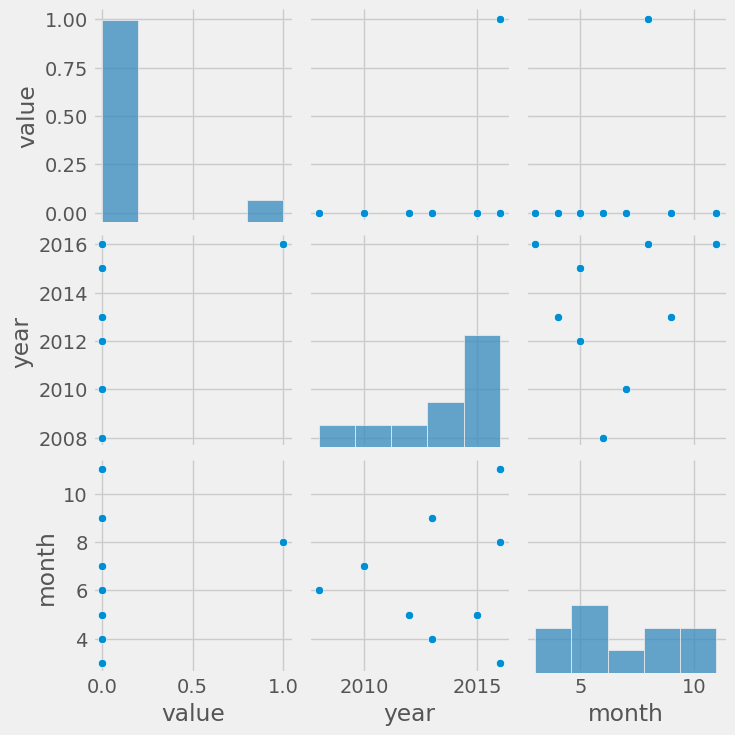

In [360]:
print("Ploting pairwise of columns")
sns.pairplot(df)

## box plot

In [361]:
label=df['Major Category'].unique()
print("The type of crimes that are taking place ")
print(label)
pos = np.arange(len(label))
totals=df.groupby('Major Category').sum()
Totals=totals['value'].to_numpy()
print("Total no of crime that took place in each catrgory: ")
print(Totals)

The type of crimes that are taking place 
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage']
Total no of crime that took place in each catrgory: 
[0 0 0 1 0]


(array([2., 0., 3., 0., 0., 2., 0., 2., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

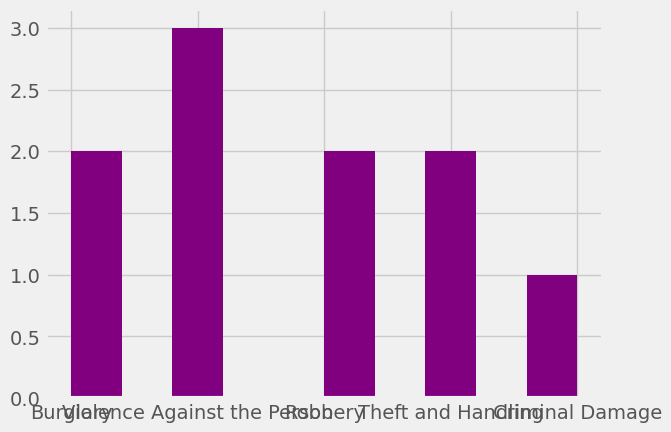

In [362]:
plt.hist(df['Major Category'], color = 'purple')

# Bar Chart

<AxesSubplot:>

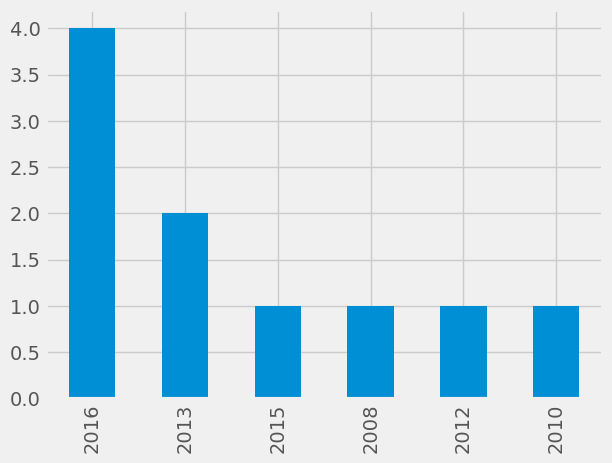

In [363]:
df.year.value_counts().plot.bar()

## Scater plot

In [372]:
df_tot = pd.DataFrame(df['year'])

In [373]:
df_tot.index = map(float,df_tot.index)

In [374]:
df_tot.reset_index(inplace = True)

In [375]:
df_tot.columns = ['year', 'total']

In [376]:
df_tot.head()

,year,total
0,0.0,2016
1,1.0,2016
2,2.0,2015
3,3.0,2016
4,4.0,2008


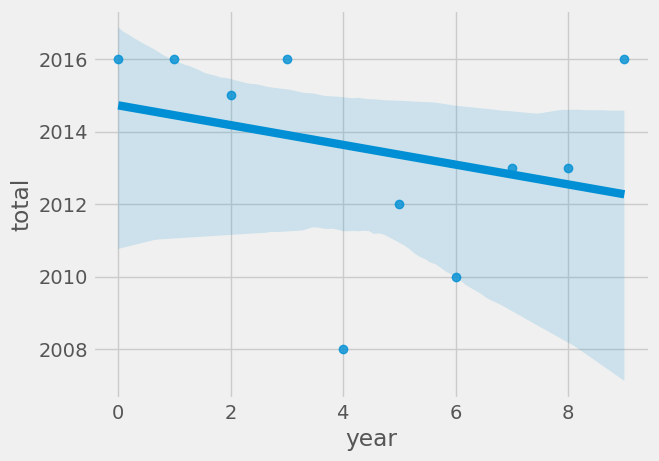

In [377]:
ax = sns.regplot(x='year', y='total', data=df_tot)

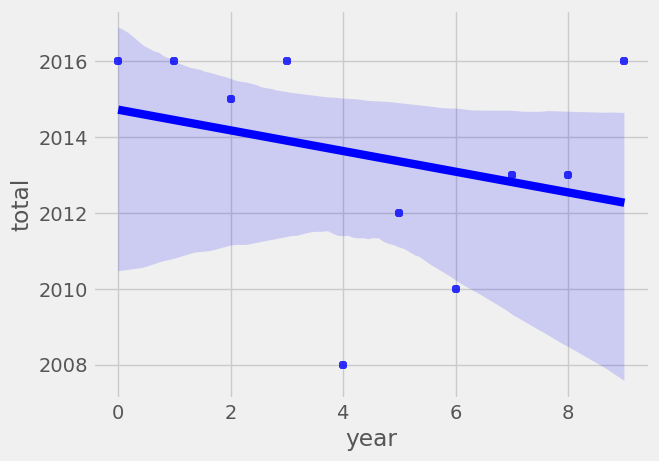

In [378]:

ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='+')

Text(0.5, 1.0, 'Kejahatan di wilayah di London dari 2008 - 2016')

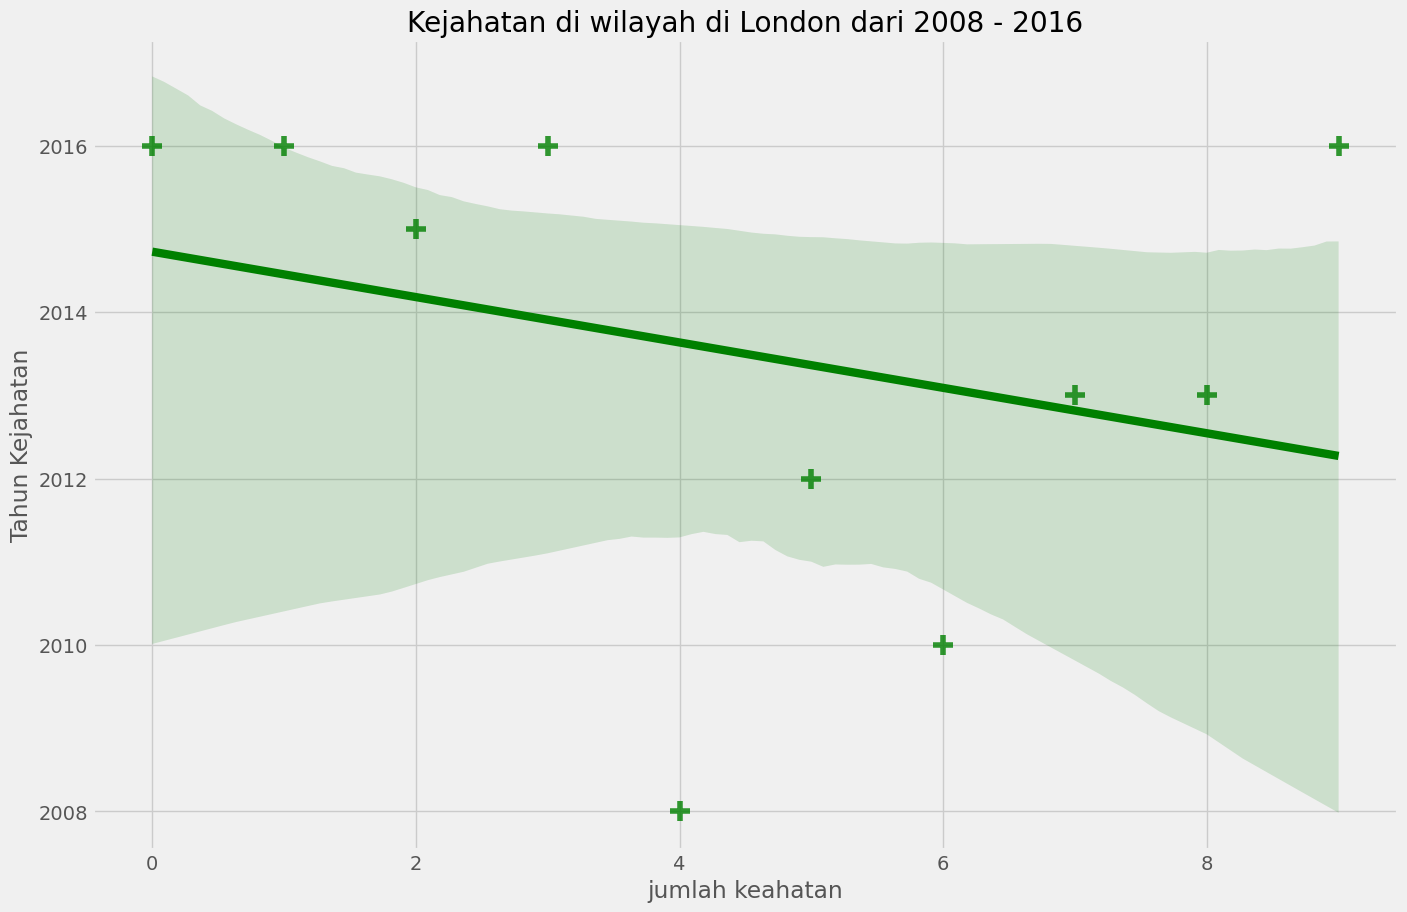

In [380]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='jumlah keahatan', ylabel='Tahun Kejahatan') # add x- and y-labels
ax.set_title('Kejahatan di wilayah di London dari 2008 - 2016') # add title

# folium map

In [383]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[51.5070985,-0.1580761,], zoom_start=8)

# display world map
world_map

In [382]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[51.5249123,-0.4166198], zoom_start=13, tiles='Stamen Toner')

# display map
world_map